<a href="https://colab.research.google.com/github/raykipa/PlantDisease/blob/master/Tomato_disease_detection_trial%20_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
train_on_gpu = torch.cuda.is_available()

In [0]:
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

CUDA is available!  Training on GPU ...
cuda:0


In [1]:
from zipfile import ZipFile
file_name = "/content/Thesis.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [0]:
DATADIR="/content/Thesis"
#CATEGORIES= ["Nitrogen deficient", "Potato_EB","Potato_H","Potato_LB", "Tomato_TS", "Tomato_MV", "Tomato_YL", "Tomato_BS", "Tomato_EB", "Tomato_H", "Tomato_LB", "Tomato_M", "Tomato_SL", "Tomato_SP"]
CATEGORIES= ["ND","TB","TH","TLM"]

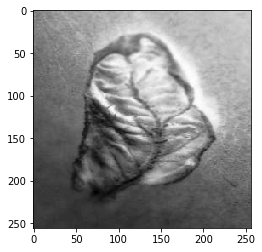

In [4]:
for category in CATEGORIES:
  path=os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap= "Greys")
    
    plt.show()
    break
  break

In [5]:
print(img_array)

[[123 126 127 ...  73  75  76]
 [121 124 128 ...  75  75  74]
 [121 125 129 ...  77  74  71]
 ...
 [177 177 177 ... 162 162 162]
 [178 178 178 ... 163 162 161]
 [178 178 178 ... 161 160 159]]


In [6]:
print(img_array.shape)

(256, 256)


In [0]:
IMG_SIZE=30
new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))

In [0]:
training_data=[]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    class_num= CATEGORIES.index(category)
  for img in os.listdir(path):
    try:
      img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass
create_training_data()

In [9]:
print(len(training_data))

9


In [0]:
import random
random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
  print(sample[1])

3
3
3
3
3
3
3
3
3


In [0]:
X = []
y= []

In [0]:
for features, label in training_data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [22]:
import tensorflow as tf